# Visualisation de la distribution et Correlation - Visualisation des données

Author: Ricardo Vallejo.

L’objectif de ces exercices est de réaliser la visualisation des données afin
d’extraire des connaissances.

**Extremely usefull good DataFrameIndexing:**
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

Acumulators in Dataframes
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
  
https://thispointer.com/pandas-dataframe-sum-method-tutorial-examples/

Basic Graphics
https://medium.com/@msjahid/line-plot-or-line-chart-in-python-with-math-ce154a7e9b17
https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540
    



# Exercice 1


Soit la base de données NBA (National Basketball Association) (nba.csv)
contenant les données relatives à chaque joueur ayant déjà joué en NBA



## 1.1. À partir du fichier nba.csv, téléchargez le contenu de la base de données


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataNBA = pd.read_csv('nba.csv')

display(dataNBA)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


## 1.2 Identifier les différentes variables et leurs types.

In [2]:
dataNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


## 1.3. Explorer la distribution de la variable salaire - diagramme en boite

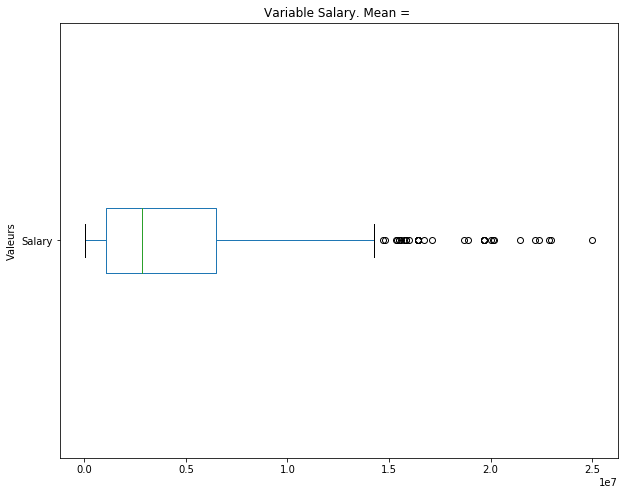

In [3]:
#Diagram de moustache

dataNBA.boxplot(column='Salary', figsize=(10,8), vert=False)
plt.ylabel("Valeurs")
plt.title("Variable Salary. Mean = " )
plt.grid()
plt.show()

In [4]:
print(dataNBA['Salary'].describe())


count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64


## 1.4. Explorer la distribution de la variable salaire à l’aide du l’histogramme/de la densité


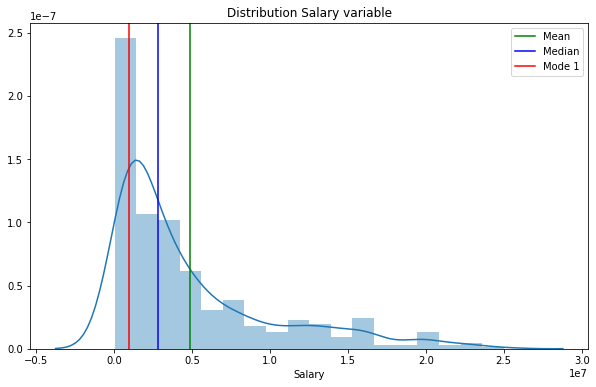

In [5]:
import seaborn as sns

mean=dataNBA['Salary'].mean();
median=dataNBA['Salary'].median();
mode=dataNBA['Salary'].mode();
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(dataNBA['Salary']);
plt.title('Distribution Salary variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();

## 1.5. Explorer la distribution de la variable salaire à l’aide du l’histogramme/de violon

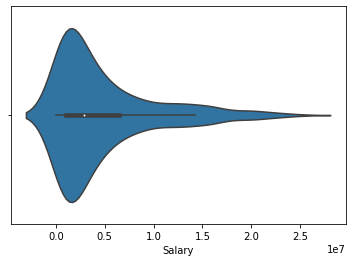

In [6]:
sns.violinplot( dataNBA['Salary'])


## 1.6. Explorer la dispersion du poids weight en fonction de la taille height.

In [7]:
## Traiter null values - DROP
dataNBA.isnull().sum()  # Detect null values in set and count


Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [8]:
dataNBA2 = dataNBA.dropna(how='any',axis=0) 
dataNBA2.isnull().sum()
dataNBA2.info() # Il reste 364 donnes, il semble etre importante le taux de elimination de cette strategie.
dataNBA2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      364 non-null    object 
 1   Team      364 non-null    object 
 2   Number    364 non-null    float64
 3   Position  364 non-null    object 
 4   Age       364 non-null    float64
 5   Height    364 non-null    object 
 6   Weight    364 non-null    float64
 7   College   364 non-null    object 
 8   Salary    364 non-null    float64
dtypes: float64(4), object(5)
memory usage: 28.4+ KB


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


In [9]:
dataNBA2['Weight'].describe()

count    364.000000
mean     219.785714
std       24.793099
min      161.000000
25%      200.000000
50%      220.000000
75%      240.000000
max      279.000000
Name: Weight, dtype: float64

In [10]:
dataNBA2['Height'].describe()

count     364
unique     17
top       6-9
freq       49
Name: Height, dtype: object

In [11]:
dataNBA2.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


In [12]:
def convertHeightPlayer(height):
    a = height.split("-")
    cm = int(a[0])*30.48 + int(a[1])*2.54
    return cm

x1='5-8'
print('test function: ', convertHeightPlayer(x1))

# Generate new column
dataNBA2['Height_cm'] = dataNBA2['Height'].apply(lambda x: convertHeightPlayer(x))



test function:  172.72


C:\Users\valm044\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
dataNBA2.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,198.12
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,195.58
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0,203.20
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0,213.36


In [14]:
dataNBA2['Height_cm'].describe()

count    364.000000
mean     200.325055
std        8.408041
min      175.260000
25%      193.040000
50%      200.660000
75%      205.740000
max      218.440000
Name: Height_cm, dtype: float64

Text(0.5, 1.0, 'Variation de Weight vs Height')

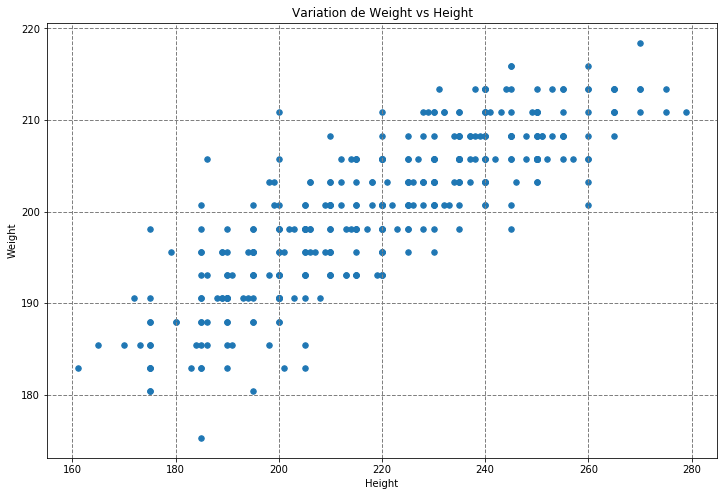

In [15]:
fig = plt.figure(figsize=(12,8))
plt.scatter( dataNBA2['Weight'], dataNBA2["Height_cm"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Weight")
plt.xlabel("Height")
plt.title('Variation de Weight vs Height')

In [16]:
corr = dataNBA2.corr()
print(corr)

             Number       Age    Weight    Salary  Height_cm
Number     1.000000  0.025090  0.239768 -0.154655   0.250638
Age        0.025090  1.000000  0.058737  0.159385  -0.030953
Weight     0.239768  0.058737  1.000000  0.144334   0.832095
Salary    -0.154655  0.159385  0.144334  1.000000   0.062184
Height_cm  0.250638 -0.030953  0.832095  0.062184   1.000000


# Excercise 2


Soit la base de données flights disponible dans seaborn qui décrit le nombre
mensuel de passagers entre les années 1949-1960.

In [17]:
import seaborn as sns

dataFLY = pd.read_csv('flights.csv')
display(dataFLY)
dataFLY2 = dataFLY.dropna(how='any',axis=0) 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [18]:
flights_wide = dataFLY2.pivot("year", "month", "passengers")
flights_wide

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


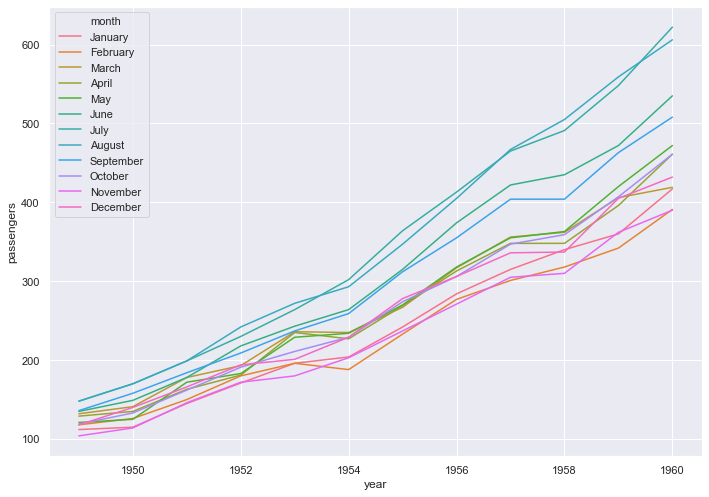

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #To format plots sns
sns.lineplot(data=dataFLY2, x="year", y="passengers", hue="month")


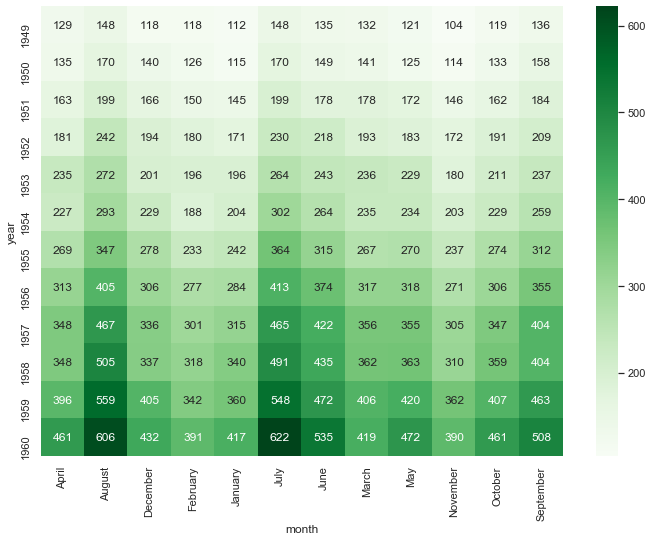

In [20]:
ax = sns.heatmap(flights_wide, annot=True, fmt="d", cmap="Greens")

# Excercise 3

In [21]:
# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
#display(data)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


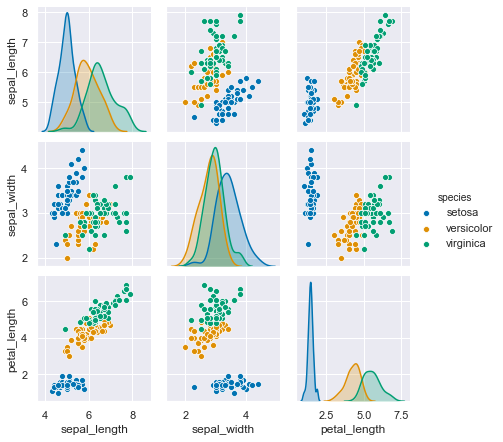

In [22]:
#2) Explorez pour chaque espèce, la largeur des sépales en fonction de la longueur des sépales et la longueur des pétales.

data2 = data[['sepal_length', 'sepal_width', 'petal_length', 'species']]
sns.set(rc={'figure.figsize':(13,13)}) #To format plots sns
sns.pairplot(data=data2 ,  hue='species', height = 2, palette = 'colorblind')
plt.show()


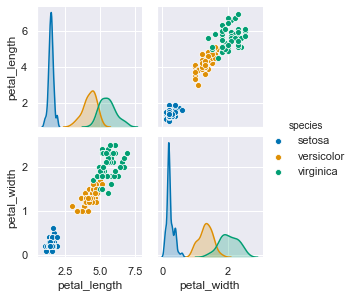

In [23]:
#Explorez la distribution de la longueur des pétales en fonction de la largeur de pétales.

data3 = data[['petal_length', 'petal_width', 'species'  ]]
sns.set(rc={'figure.figsize':(28,28)}) #To format plots sns
sns.pairplot(data=data3 ,  hue='species', height = 2, palette = 'colorblind')
plt.show()


# Excercise 4

Soit la base de données CanadaImmigration.xlsx décrivant le nombre d’immigrants au Canada (entre 1980 et 2012). La variable country désigne le
pays le pays d’origine des immigrants

In [40]:
dataInmigration = pd.read_excel('CanadaImmigration.xlsx')
dataInmigration.head(5)

,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [41]:
dataInmigration.tail()

,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191,Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,11,17,11,7,16,9,15,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,72,114,102,44,32,29,43,...,1450,615,454,663,611,508,494,434,437,407
195,Unknown,World,World,44000,18078,16904,13635,14855,14368,13303,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


# Preparing Dataset

In [42]:
# Preprocess:

# Attention! : Last line its consolidated line.  Erased
dataInmigration2 = dataInmigration.drop(195)

In [43]:
dataInmigration2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    195 non-null    object
 1   continent  195 non-null    object
 2   region     195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-null    int64

In [44]:
columns_names = dataInmigration2.columns.values
columns_names

array(['country', 'continent', 'region', 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

# 4.2. Explorez la variation de l’effectif d’immigrants entre 1980 et 2012

In [45]:
totalCountry = dataInmigration2.sum(axis=0)
X = totalCountry.drop(totalCountry.index[[0,1,2]]) #Erase country continent region
totalCountry

country      AfghanistanAlbaniaAlgeriaAmerican SamoaAndorra...
continent    AsiaEuropeAfricaOceaniaEuropeAfricaLatin Ameri...
region       Southern AsiaSouthern EuropeNorthern AfricaPol...
1980                                                     99137
1981                                                    110563
1982                                                    104271
1983                                                     75550
1984                                                     73417
1985                                                     69978
1986                                                     86048
1987                                                    134771
1988                                                    139306
1989                                                    164432
1990                                                    188054
1991                                                    207509
1992                                                   

In [46]:
import matplotlib.pyplot as plt 
x=totalCountry.iloc[0]
x  # How to index totalCountry   ?????????????

"AfghanistanAlbaniaAlgeriaAmerican SamoaAndorraAngolaAntigua and BarbudaArgentinaArmeniaAustraliaAustriaAzerbaijanBahamasBahrainBangladeshBarbadosBelarusBelgiumBelizeBeninBhutanBolivia (Plurinational State of)Bosnia and HerzegovinaBotswanaBrazilBrunei DarussalamBulgariaBurkina FasoBurundiCabo VerdeCambodiaCameroonCanadaCentral African RepublicChadChileChinaChina, Hong Kong Special Administrative RegionChina, Macao Special Administrative RegionColombiaComorosCongoCosta RicaCôte d'IvoireCroatiaCubaCyprusCzech RepublicDemocratic People's Republic of KoreaDemocratic Republic of the CongoDenmarkDjiboutiDominicaDominican RepublicEcuadorEgyptEl SalvadorEquatorial GuineaEritreaEstoniaEthiopiaFijiFinlandFranceGabonGambiaGeorgiaGermanyGhanaGreeceGrenadaGuatemalaGuineaGuinea-BissauGuyanaHaitiHondurasHungaryIcelandIndiaIndonesiaIran (Islamic Republic of)IraqIrelandIsraelItalyJamaicaJapanJordanKazakhstanKenyaKiribatiKuwaitKyrgyzstanLao People's Democratic RepublicLatviaLebanonLesothoLiberiaLibyaLie

# In the world

# Barplot

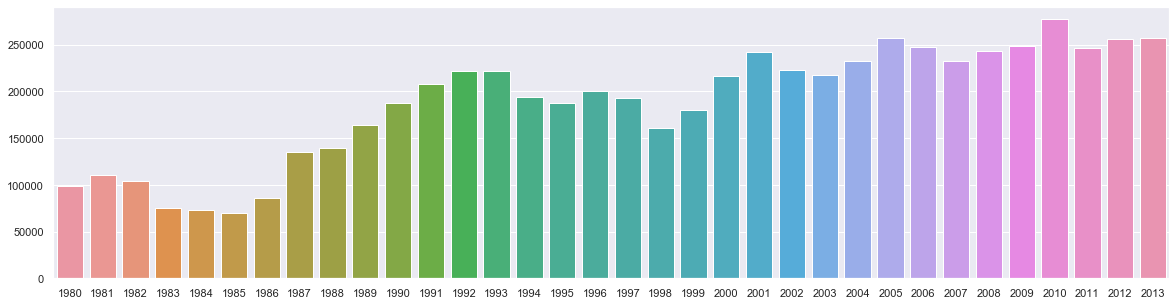

In [47]:
years = dataInmigration2.columns[3:]
X = dataInmigration2[years]

sns.set(rc={'figure.figsize':{20,5}})
sns.barplot(x=years, y = X.sum())

# LineChart

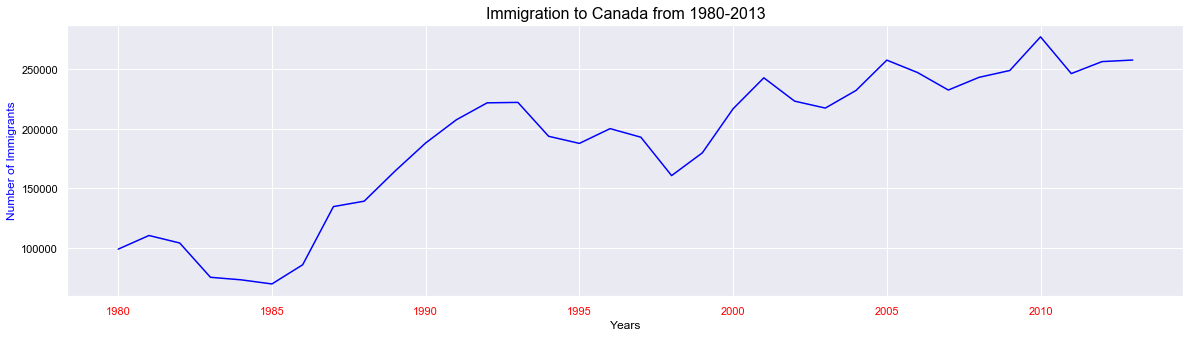

In [48]:
plt.plot(years, X.sum(), color='Blue')
plt.title('Immigration to Canada from 1980-2013', color = 'black', fontsize = 16)
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'black')
#plt.savefig('linechart_single.png')
plt.show()

# 4.3 Explorez l’évolution au cours du temps du nombre d’immigrants d’origine indienne


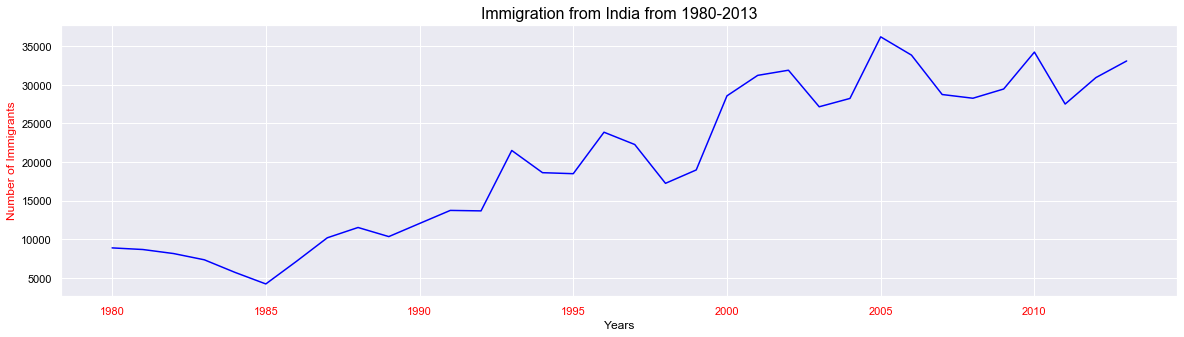

In [49]:
# Create DataFrame with country like index
dataInmigration2_indexCountry_ = dataInmigration2.set_index('country')
dataInmigration2_indexCountry = dataInmigration2_indexCountry_.drop(['continent', 'region'], axis=1) #df.drop(['B', 'C'], axis=1)
dataInmigration2_indexCountry
x_india = dataInmigration2_indexCountry.loc[['India']].values
x_india = x_india.flatten('F') #Transpose to be row


plt.plot(years,x_india, color='Blue')
plt.title('Immigration from India from 1980-2013', color = 'black', fontsize = 16)
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants', color = 'red')
plt.xticks(color = 'red')
plt.yticks(color = 'black')
plt.show()

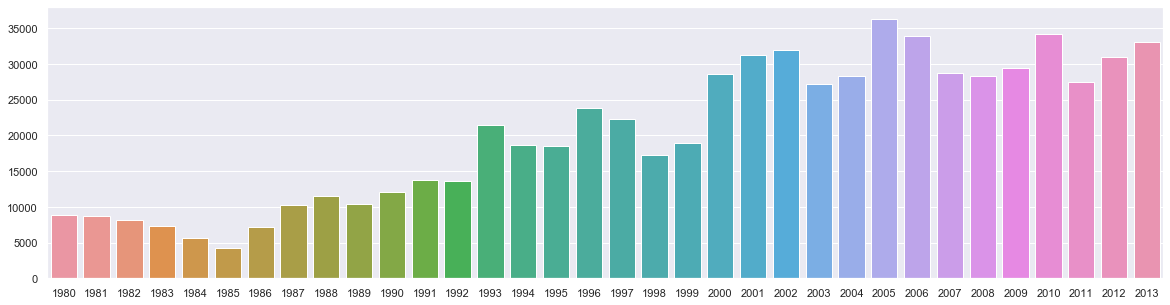

In [50]:
sns.set(rc={'figure.figsize':{20,5}})
sns.barplot(x=years, y = x_india)

# Compared with another - Colombia

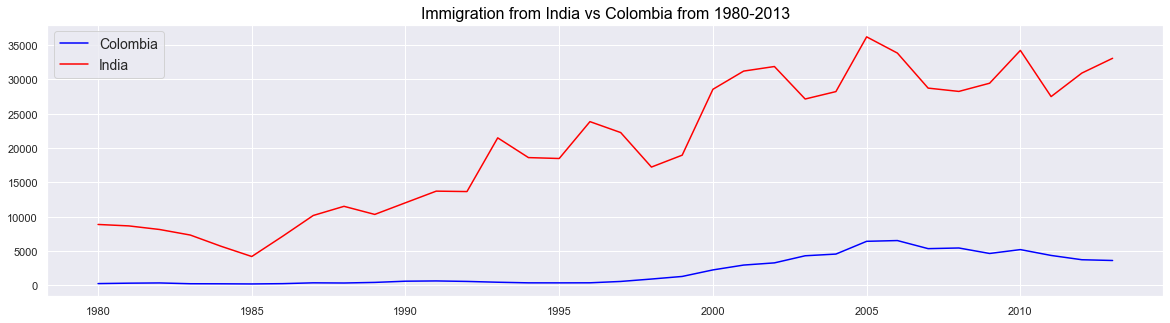

In [51]:
# Create DataFrame with country like index
x_col = dataInmigration2_indexCountry.loc[['Colombia']].values
x_col = x_col.flatten('F') #Transpose to be row
plt.plot(years,x_col, color='Blue', label = 'Colombia')
plt.plot(years,x_india, color='Red', label = 'India')
plt.title('Immigration from India vs Colombia from 1980-2013', color = 'black', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

# 4. Explorez l’évolution au cours du temps du nombre d’immigrants des cinq premiers pays (en termes de nombre d’immigrants le plus élevé -
(top 5))

In [52]:
dataInmigration2_indexCountry['Total'] =  dataInmigration2_indexCountry.sum(axis=1)
dataInmigration2_indexCountry

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15
Angola,1,3,6,6,4,3,5,5,11,6,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,0,0,0,0,42,52,51,61,34,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,368,426,626,241,237,196,213,519,374,538,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,0,0,0,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [53]:
dataInmigration2_indexCountry.sort_values(by=['Total'], inplace=True, ascending=False)
x2 = dataInmigration2_indexCountry.head(5) #First 5 after order
x2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


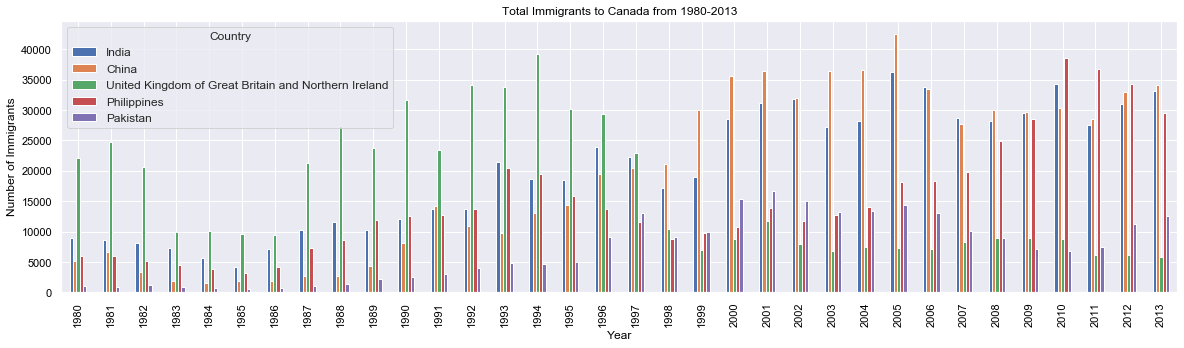

In [54]:
x2 = x2.loc[:, x2.columns != 'Total']
x2.T.plot.bar(edgecolor = 'white') #Transpose 
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()

In [55]:
x2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


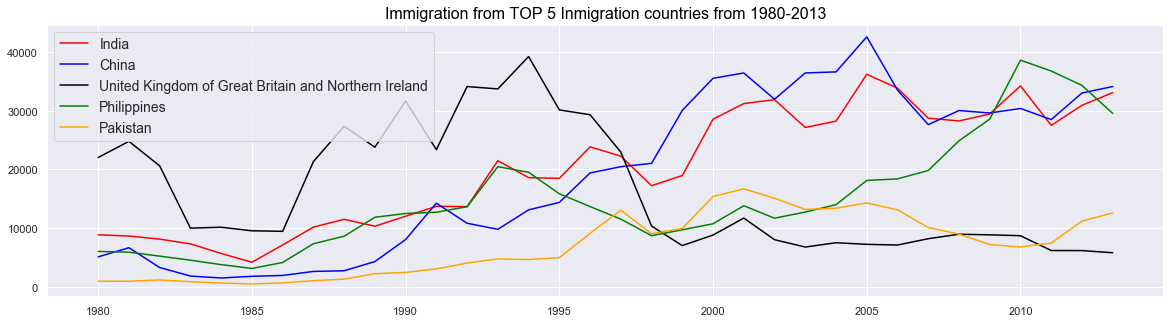

In [56]:
# Chart

dataInmigration2_indexCountry = dataInmigration2_indexCountry.loc[:, dataInmigration2_indexCountry.columns != 'Total']
plt.title('Immigration from TOP 5 Inmigration countries from 1980-2013', color = 'black', fontsize = 16)
plt.plot(years,dataInmigration2_indexCountry.loc[['India']].values.flatten('F'), color='Red', label = 'India')
plt.plot(years,dataInmigration2_indexCountry.loc[['China']].values.flatten('F'), color='Blue', label = 'China')
plt.plot(years,dataInmigration2_indexCountry.loc[['United Kingdom of Great Britain and Northern Ireland']].values.flatten('F'), color='Black', label = 'United Kingdom of Great Britain and Northern Ireland')
plt.plot(years,dataInmigration2_indexCountry.loc[['Philippines']].values.flatten('F'), color='Green', label = 'Philippines')
plt.plot(years,dataInmigration2_indexCountry.loc[['Pakistan']].values.flatten('F'), color='Orange', label = 'Pakistan')
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

In [57]:
# Iterative Chart



# 4.5.  Comparez la proportion du nombre d’immigrants provenant des cin premiers pays (en termes de nombre d’immigrants - (top 5)) pour les années 1980, 1990, 2000 et 2010.

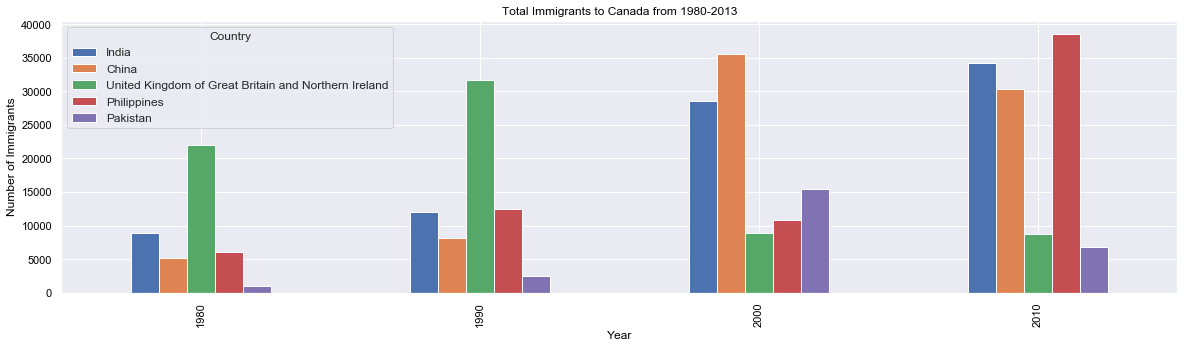

In [58]:
sel_cols = [1980, 1990, 2000, 2010]
x2 = x2.loc[:,sel_cols]
x2.T.plot.bar(edgecolor = 'white') #Transpose 
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()

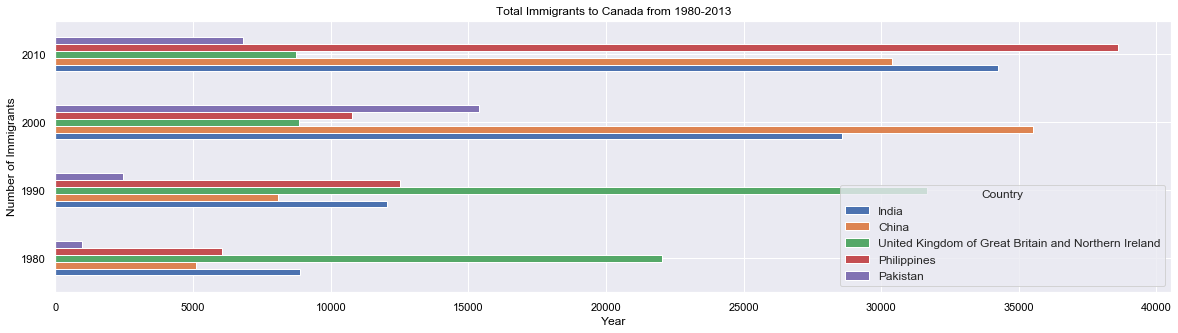

In [59]:
x2.T.plot.barh(edgecolor = 'white') #Transpose 
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()

# Extra

C:\Users\valm044\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


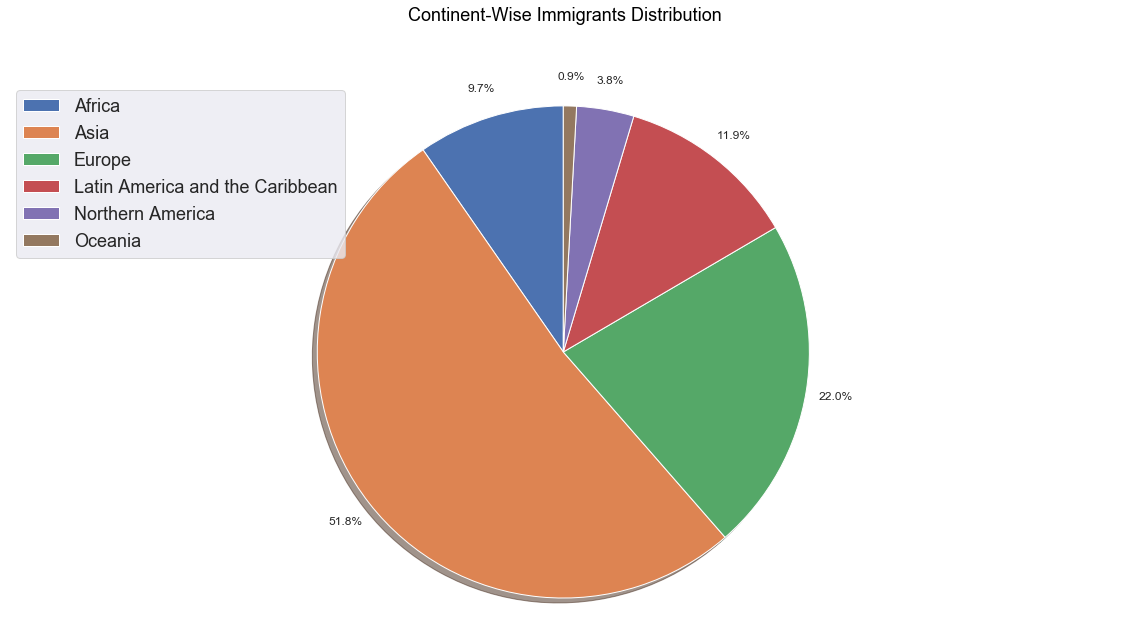

In [76]:
# Pie Chart
dataInmigration2_indexCountry_['Total'] =  dataInmigration2_indexCountry_.sum(axis=1)
df_pie = pd.DataFrame(dataInmigration2_indexCountry_.groupby('continent')['Total'].sum().T)

plt.figure(figsize=(20, 10)) 
plt.pie(df_pie, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 18)
plt.axis('equal')
#plt.savefig('pie.png')